In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#path to spykes
import sys
sys.path.insert(0, '../spykes/')

import spykes as spy 

# Reproduce a figure from a published paper with a public dataset

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 

print 'this dataset: https://crcns.org/data-sets/motor-cortex/alm-1'
#Dataset citation:
    #Nuo Li, Charles R Gerfen, Karel Svoboda (2014); \
    #Extracellular recordings from anterior lateral motor cortex (ALM) \
    #neurons of adult mice performing a tactile decision behavior. \
    #CRCNS.org. http://dx.doi.org/10.6080/K0MS3QNT
    
print 'this publication: http://www.nature.com/nature/journal/v519/n7541/full/nature14178.html'
Image(url= "http://www.nature.com/nature/journal/v519/n7541/carousel/nature14178-f1.jpg")

this dataset: https://crcns.org/data-sets/motor-cortex/alm-1
this publication: http://www.nature.com/nature/journal/v519/n7541/full/nature14178.html


# Let's try to reproduce a panel of Fig. 2b

In [3]:
Image(url= "http://www.nature.com/nature/journal/v519/n7541/carousel/nature14178-f2.jpg")

#### neuron in the upper-left panel of Fig.2b is neuron `9` of session `ANM218457_20131006`


# Load data

In [4]:
import scipy.io
path_to_downloaded_data = '/Volumes/JUICE/lab projects/crcns_data/'
mat = scipy.io.loadmat(path_to_downloaded_data + 'data_structure_ANM218457/data_structure_ANM218457_20131006')

## 1. get spike times

In [5]:
neuron_n = 8
spike_times = mat['obj']['eventSeriesHash'][0][0]['value'][0][0][0][neuron_n][0][0][1]
spike_times = [i[0] for i in spike_times]
neuron = spy.Spyke(spike_times, neuron_n)
print 'neuron %d has a firing rate of %0.2f' % (neuron_n, neuron.firingrate)

neuron 8 has a firing rate of 5.07


## 2. get features

In [6]:
#get features
features = dict()

#get Lick right and Lick left
trialTypeMat = mat['obj']['trialTypeMat'][0][0]
trialTypeStr = mat['obj']['trialTypeStr'][0][0]
trialTypeStr = np.array([i[0][0] for i in trialTypeStr])
for ind, feat in enumerate(trialTypeStr):
    features[feat] = trialTypeMat[ind]

#get good trials
goodTrials = mat['obj']['trialPropertiesHash'][0][0][0][0][2][0][3]
features['goodTrials'] = np.array([i[0] for i in goodTrials])

#get cue times
trialStart = mat['obj']['trialStartTimes'][0][0][0]
cueTimes = mat['obj']['trialPropertiesHash'][0][0][0][0][2][0][2]
cueTimes = np.array([i[0] for i in cueTimes])
features['realCueTimes'] = trialStart+cueTimes

print 'now we have these features:'
print features.keys()

now we have these features:
[u'HitR', u'ErrL', 'realCueTimes', 'goodTrials', u'NoLickL', u'LickEarly', u'NoLickR', u'ErrR', u'StimTrials', u'HitL']


## 3. impose conditions on features

In [7]:
conditions = {}

conditions[0]= {}
conditions[0]['HitR'] = [1]
conditions[0]['goodTrials'] = [1]
                   
conditions[1]= {}
conditions[1]['HitL'] = [1]
conditions[1]['goodTrials'] = [1]

condition_names = ['Lick right','Lick left']

 ## 4. and plot psth

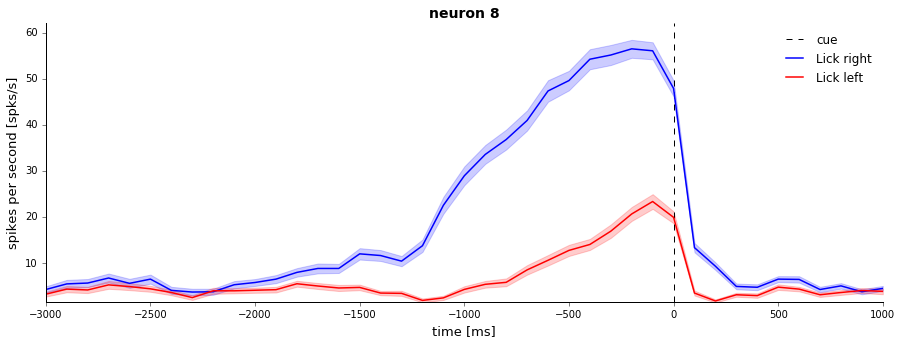

In [8]:
psth = neuron.get_psth(features['realCueTimes'], features, conditions, window=[-3000,1000], binsize=100, plot=False);
neuron.plot_psth(psth, condition_names=condition_names, colors=['b','r'], figsize=(15,5), event_name = 'cue')

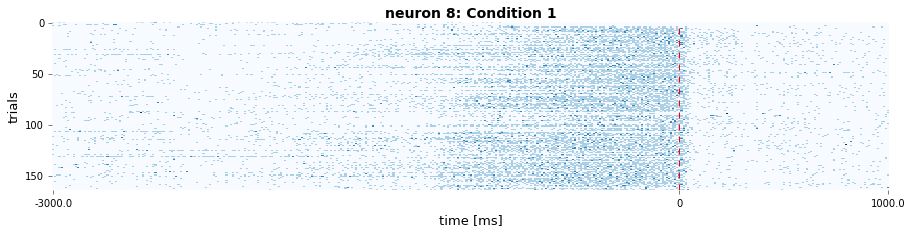

Condition 1: {'goodTrials': [1], 'HitR': [1]}


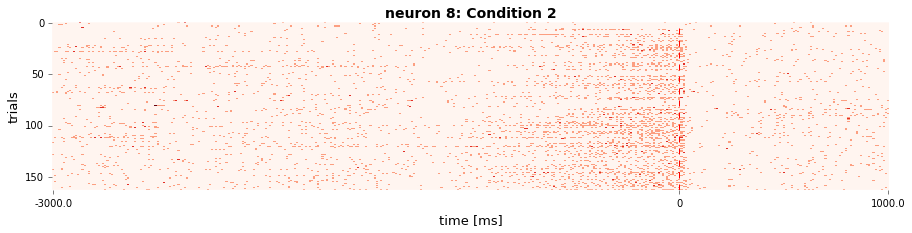

Condition 2: {'goodTrials': [1], 'HitL': [1]}


In [9]:
raster = neuron.get_raster(features['realCueTimes'], features, conditions, window=[-3000,1000], binsize=10, plot = False);
neuron.plot_raster(raster, figsize=(15,3), cmap = [plt.get_cmap('Blues'), plt.get_cmap('Reds')])